<a href="https://colab.research.google.com/github/Gabrie1Xia/CIS-519-Project/blob/main/Student_Version_CIS545_Fall_2022_HW1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CIS 5450 Homework 1: Data Wrangling and Cleaning (Fall 2022)
_Due: September 28th, 10:00 PM EST_

Hello future data scientists and welcome to CIS 5450! In this homework, you will familiarize yourself with Pandas 🐼! The cutest animal and one of the essential libraries for Data Science. This homework is focused on one of the most important tasks in Data Science: preparing datasets so that they can be analyzed, plotted, used for machine learning models, etc...

This homework will be broken into analyzing several datasets across three sections and a fourth section focusing on XPath!

1. Working with Airports, Airlines and Delayed Flights data

2. Working on merged/joined versions of the datasets (More on this later...)

**IMPORTANT NOTE: Before starting, you must click on the "Copy To Drive" option in the top bar. This is the master notebook so <u>you will not be able to save your changes without copying it </u>! Once you click on that, make sure you are working on that version of the notebook so that your work is saved** 

Run the following two cells to setup the notebook

In [ ]:
!pip install -i https://test.pypi.org/simple/ penn-grader==0.5.0

In [ ]:
from penngrader.grader import *

# Import neccessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
from string import ascii_letters
import matplotlib.pyplot as plt
import datetime as dt
import requests
from lxml import html
import math

In [ ]:
!wget -nc https://storage.googleapis.com/penn-cis5450/flights.csv
!wget -nc https://storage.googleapis.com/penn-cis5450/airports.csv
!wget -nc https://storage.googleapis.com/penn-cis5450/airlines.csv

#What is Pandas?

<div class = "row">
<div class="column">
Apart from animals, Pandas is a Python library to aid with data manipulation/analysis. It is built with support from Numpy. Numpy is another Python package/library that provides efficient calculations for matrices and other math problems.
</div><div class="column">
<p class="d-flex" align = "center">
<img src = "https://thehill.com/sites/default/files/styles/article_full/public/panda_getty.jpg?itok=4ce_5sip" height= "200" align ="center"/>
<img src = "https://cff2.earth.com/uploads/2016/09/08101343/giant-panda-bear_1big_stock1.jpg" height= "200" align ="center"/>
</p>
</div>
</div>

Let's also get familiarized with the **PennGrader**. It was developed specifically for 545 by a previous TA, Leonardo Murri. 
<br>

PennGrader was developed to provide students with instant feedback on their answer. You can submit your answer and know whether it's right or wrong instantly. We then record your most recent answer in our backend database. Let's try it out! Fill in the cell below with your 8-digit Penn ID and then run the following cell to initialize the grader.

In [ ]:
# PLEASE ENSURE YOUR PENN-ID IS ENTERED CORRECTLY. IF NOT, THE AUTOGRADER WON'T KNOW WHO 
# TO ASSIGN POINTS TO YOU IN OUR BACKEND
STUDENT_ID = 9999999 # YOUR PENN-ID GOES HERE AS AN INTEGER #

# You should also update this to a unique "secret" just for this homework, to
# authenticate this is YOUR submission
SECRET = STUDENT_ID

Leave this cell as-is...

In [ ]:
%%writefile config.yaml

grader_api_url: 'https://wyv616tp17.execute-api.us-east-1.amazonaws.com/default/Grader'
grader_api_key: 'Kd32fl3g3p917iM0zwjiO23Bitj4PO9ga4LektOa'

In [ ]:
grader = PennGrader('config.yaml', 'CIS_5450_Fall22_HW1', STUDENT_ID, SECRET)

```
# This is formatted as code
```

Pandas (the animal) are lazy. Their days are made up of eating and sleeping. Just like mine. Let's run a cell just to make sure PennGrader works.

#### **TODO: PennGrader Check [2 points]**
- Change `favorite_activity` to whichever panda "activity" you prefer (2 points)

<br>

**Note**: We'll use cells like these "TODO" above to indicate what is important to have in each section of the notebook. Some general guidelines:

- You don't have to do all of these in one cell/step; we're just labeling them for each section which might have smaller sub-sections (ex: look at how 1.2 is set up) for your reference
- Make sure to read these carefully and do everything that is asked
- Make sure to run all the PennGrader test cells; if we forgot anything, please let us know ASAP on Ed Discussion so that we can update the Markdown cells here

In [ ]:
# In this cell, put which panda activity you prefer in lowercase(eating or sleeping)
# Input activity name in all lowercase
favorite_activity =

In [ ]:
# Run this cell to submit to PennGrader!

# [CIS 545 PennGrader Cell] - 2 points
grader.grade(test_case_id = 'panda_test', answer = favorite_activity)

You just had your first experience with the Penn Grader! For the future questions, once you have completed a question, you can submit your answer to the Penn Grader for immediate feedback. Awesome, right?

We will use scores from Penn Grader to determine your grade. You will still need to submit your notebook so we can check for cheating and plagarism. Do not cheat. 

**Note:** If you run Penn Grader after the due date for any question, your assignment will be marked late, even if you already had full points for the question before the deadline. To remedy this, if you're going to run your notebook after the deadline, either do not run the grading cells, or reinitialize the grader with an empty or clearly fake ID such as <code>999999999999</code> (please use 10+ digits to be clearly a fake <code>STUDENT_ID</code>)

#Adding our data so that our code can find it

We can't be data scientists without data! We provided code for you to download the data (the "wget" cell from earlier). If you go to the view on the left and click files, you should see something similar to this image

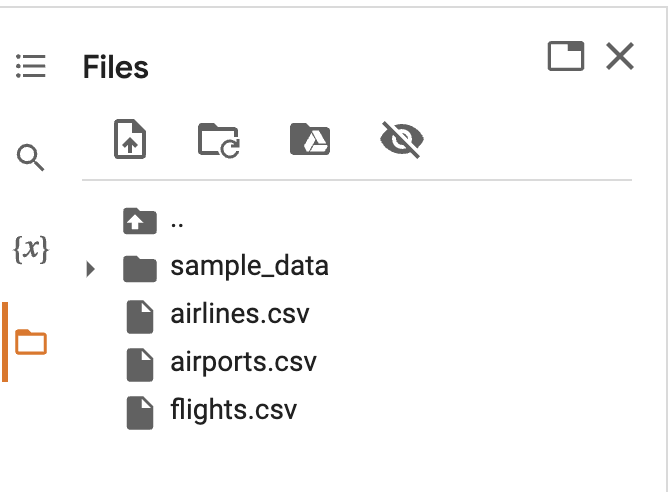

#Part 1: Working with Flight Data [36 points]

In this part of the homework we will be working with a dataset focused on Flight Delays and Cancellations! 

Let's first load our dataset into a Pandas Dataframe. Use Pandas's <code>read_csv</code> functionality, which you can find documentation for here:

https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html

While reading documentation is hard at first, we **strongly encourage you** to get into the habit of doing this, since many times your questions will be answered directly by the documentation (ex: "why isn't my dataframe dropping duplicates" or "why didn't this dataframe update").

#### **TODO**
- Save the Flights dataframe to a variable named: <code>flights_df</code>
- Save the Airports dataframe to a variable named: <code>airports_df</code>
- Save the Airlines dataframe to a variable named: <code>airlines_df</code>

In [ ]:
#TODO: Import your three files to pandas dataframes -- make sure the dataframes are named correctly!
flights_df = 
airports_df = 
airlines_df = 

Let's focus on the `flights_df` for now and see what the dataframe looks like. Display the first 10 rows of the dataframe in the cell below (take a look at the documentation to find how to do this!)

In [ ]:
#TODO: Display the first 10 rows of `flights_df`

Another thing that is often times helpful to do is inspect the types of each column in a dataframe. Output the types of `flights_df` in this cell below. 

In [ ]:
# TODO: Display the datatypes in `flights_df`


Save the types of the MONTH, AIRLINE, FLIGHT_NUMBER, and ORIGIN_AIRPORT columns to a series called `flights_df_types` (retaining the index names) and pass them into the autograder cell below.

In [ ]:
#View the output here!


In [ ]:
# TEST CASE: flights_df_types (2pt)
# [CIS 545 PennGrader Cell] - 2 points
grader.grade(test_case_id = 'flights_df_types', answer = flights_df_types)

##1.1 Cleaning up Flights Data (5 points)

When you work with data, you'll have NaNs, duplicates or columns that don't give much insight into the data. There are different ways to deal with missing values (i.e. imputation, which you can read into on your own), but for now, let's drop some of these rows in `flights_df` to clean up our data. Note that there might be multiple ways to do each step. Also note that a lot of the columns in `flights_df` have all nulls. Thus, **ensure to drop the unnecessary columns before filtering out rows with nulls**


Refer to the documentation if you get stuck -- it's your best friend!

<br>

#### **TODO: 1.1**

- Keep only the following columns: <br>
 `YEAR`, `MONTH`, `DAY`, `DAY_OF_WEEK`, `AIRLINE`, `FLIGHT_NUMBER`, `ORIGIN_AIRPORT`, `DESTINATION_AIRPORT`, `SCHEDULED_DEPARTURE`, `DEPARTURE_TIME`, `DEPARTURE_DELAY`, `DISTANCE`, `SCHEDULED_ARRIVAL`, `ARRIVAL_TIME`, `ARRIVAL_DELAY`, `CANCELLED`
- Drop rows that have nulls (e.g. NaN) in them
- Cast `DEPARTURE_DELAY` and `ARRIVAL_DELAY` columns to type `int`
- Save the result to `flights_cleaned_df` (5 points)

In [ ]:
#TODO: Keep only the necessary columns


#TODO: Drop nulls


flights_cleaned_df =

In [ ]:
# TEST CASE: flights_cleaned_df (5pt)
# [CIS 545 PennGrader Cell] - 5 points
grader.grade(test_case_id = 'flights_cleaned_df', answer = flights_cleaned_df.head(1000))

##1.2 Data Wrangling with Flights Data

Now, let's process the data in an appropriate format so that we can answer some queries more easily. Make sure to use `flights_cleaned_df` for this part.

We define a departure delay as any flight with a `DEPARTURE_DELAY` column value above 0 and an arrival delay as any flight with an `ARRIVAL_DELAY` column value above 0.

**TODO: 1.2**

*  Create a column called `IS_DEPART_DELAY` that contains a value of **0** if the flight does not have a departure delay and a value of **1** if it does
* Create a column called `IS_ARRIVAL_DELAY` that contains a value of **0** if the flight does not have an arrival delay and a value of **1** if it does
*   Save the final result into `flights_final_df` (4 points)


Hint: See [apply](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.apply.html) and `lambda` in Pandas documentation.

In [ ]:
#TODO: Create flight_final_df
flights_final_df = 

In [ ]:
# TEST CASE: flights_final_df (4pt)
# [CIS 545 PennGrader Cell] - 4 points
grader.grade(test_case_id = 'flights_final_df', answer = flights_final_df[(flights_final_df['MONTH'] == 4) & (flights_final_df['DAY'] == 15)])

###1.2.1 Compute the Top 3 Months with the Most Delayed Flights (4 points)

In this section we will compute the total delays per month and get the top 3 months with the most delayed flights. We define total delays per month as the sum of the counts of departure delays and arrival delays. Make sure to use `flights_final_df` in this section.


**TODO: 1.2.1**

*   See the `groupby()` function 
*   Create a dataframe `delayed` with only the columns `MONTH`, `IS_DEPART_DELAY` and `IS_ARRIVAL_DELAY`
*   Get the total counts of delayed departure and arrival flights per month using `delayed`
*   Add the column `TOTAL_DELAYS` to the dataframe `delayed`, where `TOTAL_DELAYS` is the sum of the counts of the delayed departure and arrival flights for each month
*   Create dataframe `most_delays_df`, which contains the columns `MONTH` and `TOTAL_DELAYS`
*   Sort `most_delays_df` in descending order and keep the top 3 months with the most total_delays



In [ ]:
#TODO: Get a subset of the columns from flights_final_df and call this df most_delays_df
most_delays_df =

In [ ]:
# TEST CASE: most_delays_df (4pt)
# [CIS 545 PennGrader Cell] - 4 points
grader.grade(test_case_id = 'most_delays_df', answer = most_delays_df)

###1.2.2 Compute Average Departure Delay Times by Airline (5 points)

In this section we will compute the average departure delay times by Airline. Use `flights_final_df` in this section.

**TODO: 1.2.2**

*   See the `groupby()` function 
*   Create a dataframe `avg_departure_df` with columns `AIRLINE` and `DEPARTURE_DELAY`, where `DEPARTURE_DELAY` is the average departure delay time
*   Round the values of `DEPARTURE_DELAY` to 2 decimal places
*   Sort `avg_departure_df` in descending order by `DEPARTURE_DELAY` and keep the top 10 highest departure delay rows. 

**Note:** Ensure that you are only including Departure Delay times of flights whose departures are actually delayed in your average

In [ ]:
#TODO: Create avg_departure_df
avg_departure_df = 

In [ ]:
# TEST CASE: most_delays_df (5pt)
# [CIS 545 PennGrader Cell] - 5 points
grader.grade(test_case_id = 'avg_departure_df', answer = avg_departure_df)

###1.2.3 Compute Percent Difference Between Arrival Delay Times of Short vs Long Flights (4 points)
Now we will compute the difference between the percentage of short flights with an arrival delay and the percentage of long flights with an arrival delay. Consider a short flight as a flight whose distance **is less than or equal to** the average distance of all the flights in the cleaned flights df. A long flight is a flight whose distance **is greater than** the average distance of all the flights in the cleaned flights df.

**TODO: 1.2.3**

*  Find the average distance of all flights 
* Create a `short_flights` df which contains all flights with distance less than or equal to the average distance
* Create a `long_flights` df which contains all flights with distance greater than the average distance
* Find the percent of flights with a delayed arrival time for each df called `short_delay_percentage` and `long_delay_percentage` respectively. Round these percentages to 4 decimal points. Hint: Use the round() function.   



In [ ]:
#TODO: Find percentage of short flights that are delayed  
short_delay_percentage = 

#TODO: Find percentage of long flights that are delayed  
long_delay_percentage = 

In [ ]:
# TEST CASE: short_delay_percentage (4pt)
# [CIS 545 PennGrader Cell] - 4 points
grader.grade(test_case_id = 'short_long_delay_percent', answer = (short_delay_percentage, long_delay_percentage))

##1.3 Time of Day with Most Delays in Summertime (4 points) 
We are interested in the time of day in the summer (morning, afternoon, evening, night) with the most number of delays. 


<br>

#### **TODO: 1.3**

- Create a table `summer_flights_df` that contains only flights that occur during the months of April, May, June, July, August, and September (months 4-9)
- Add a column to `summer_flights_df` called `TIME_OF_DAY` that is the time of day using the hour of the departure time. The hours correspond to 'Night' (0 <= hour < 6), 'Morning' (6 <= hour < 12),'Afternoon' (12 <= hour < 18) and 'Evening' (18 <= hour <= 24).
  - **Hint**: To make your code more readable, consider writing a helper function to return time of day and then calling this function with your lambda function. 
- Count all the flights with departure delays by time of day.
- Create a df called `time_of_day_delays` with the columns `TIME_OF_DAY` and `Sum` where `TIME_OF_DAY` is night, morning, afternoon, evening and `Sum` is number of flights with departure delays during this time of day. 
- Return `time_of_day_delays` in order of time with most delays 


In [ ]:
# TODO: Create summer_flights_df
summer_flights_df = 

# TODO: Create time_of_day_delays df
time_of_day_delays = 

In [ ]:
# TEST CASE: time_of_day_delays (4pt)
# [CIS 545 PennGrader Cell] - 4 points
grader.grade(test_case_id = 'time_of_day_delays', answer = time_of_day_delays)

##1.4 Cleaning up Airport Data (4 points)

We now need to clean up the Airport Data. Let's follow a similar procedure as before in order to drop nulls and unnecessary columns

<br>

#### **TODO: 1.4**

- Drop rows that have nulls (e.g. NaN) in them
- Drop `LATITUDE` and `LONGITUDE` columns, as they are not needed
- Save the result to `airport_cleaned_df` (4 points)

In [ ]:
# TODO Drop rows with nulls 

# TODO Drop Latitude and Longitude Columns

airport_cleaned_df = 

In [ ]:
# TEST CASE: airport_cleaned_df (4pt)
# [CIS 545 PennGrader Cell] - 4 points
grader.grade(test_case_id = 'airport_cleaned_df', answer = airport_cleaned_df)

##1.5 Number of Airports per State (4 points)

We are interested in finding the number of airports per state. Remember to use the `airport_cleaned_df`

<br>

#### **TODO: 1.5**

- See `groupby()` function
- Create a table `airport_count_df` that contains the columns `STATE` and `COUNT`, where `COUNT` is the number of airports per state
- Sort `airport_count_df` in descending order by `COUNT`

In [ ]:
# TODO Create airport_count_df
airport_count_df = 

In [ ]:
# TEST CASE: airport_count_df (4pt)
# [CIS 545 PennGrader Cell] - 4 points
grader.grade(test_case_id = 'airport_count_df', answer = airport_count_df)

#Part 2: Combining the data [47 points]

When you become a full time data scientist, a lot of times, data will be spread out across multiple files/tables. The way to combine these tables is through join/merge operations. If you're familiar with SQL, this will be very familiar to you. If not, don't worry. I believe in you!

To start, here's a nice diagram which shows you the different types of joins


<p align = "center">
<img src = "https://i.stack.imgur.com/hMKKt.jpg" width= "600" align ="center"/>
</p>

A clarifying point: The two venn diagrams with the "(if Null)" are also called Left Outer Join and Right Outer Join

##2.1 Metrics on Specific Airlines in Each State



#### 2.1.1 Airports that Begin with the Letter B (4 points)

We are interested in the number of airports in each state that begin with the letter B.  

<br>

##### TODO: 2.1.1

- Add a column to this `airport_cleaned_df` called `Count` that is a 1 if the first letter of the airport is a 'B' and 0 otherwise.  
- Return a df called `b_airports` with number of airports in each state that start with the letter B. There should be two columns `STATE` and `Count`. Return this df in sorted order by count in descending order and then state name in ascending order. 

NOTE: By airport, we meant `AIRPORT`, not `IATA_CODE`.

NOTE: Be cautious about `sort_values` as sorting order does matter


In [ ]:
# TODO: Create b_airports df
b_airports = 

In [ ]:
# TEST CASE: b_airports (4pt)
# [CIS 545 PennGrader Cell] - 4 points
grader.grade(test_case_id = 'b_airports', answer = b_airports)

#### 2.1.2 Total Flights Out of Airports that Begin with B (4 points)
Now lets find the number of flights that fly out of each state from an airport that starts with the letter B. Make sure to include states with no airports that begin with the letter 'B'. For these states the count should be 0. 

TODO: 
 - Create a df called `b_total_flights` that has columns `STATE` and `Count` where count is the number of flights that fly out of an airport that begins with the letter B in a given state. 
 - Return this df in sorted order by count in descending order and then state name in ascending order.  



In [ ]:
# TODO: Create b_total_flights df  
b_total_flights = 

In [ ]:
# TEST CASE: b_airports (4pt)
# [CIS 545 PennGrader Cell] - 4 points
grader.grade(test_case_id = 'b_total_flights', answer = b_total_flights)

####2.1.3 Airlines that Don't Fly out of Allentown PA (5 points)
Return a list of airlines that don’t fly out of Allentown, 
PA.
TODO: 
- Create a list called invalid_airlines that includes all airlines that don't have flight starting in Allentown, PA (ABE). Return this list in sorted alphabetical order.

**Hint**: Use a left join and work with the `airlines_df` df to avoid running out of RAM and crashing your session.  


In [ ]:
# TODO: Create invalid_airlines list 
invalid_airlines = 

In [ ]:
# TEST CASE: b_airports (5pt)
# [CIS 545 PennGrader Cell] - 5 points
grader.grade(test_case_id = 'no_allentown', answer = invalid_airlines)

##2.2 Finding the Most Unreliable Airlines in December

We now want to see which airlines tend to have the most flight delays in December. In this case, we consider a flight delayed if either its arrival or departure was delayed.


#### 2.2.1 Sorted Delay Counts (6 points)
- Create a dataframe called `airline_delays` that contains the columns `AIRLINE` and `DELAY_COUNT`, where `DELAY_COUNT` is the total number of flights delayed by this airline in December. Note that `AIRLINE` is the actual airline name (ex: Alaska Airlines)
- Sort this dataframe in descending order by `DELAY_COUNT`

**NOTE:** To be considered delayed, either IS_DEPART_DELAY OR IS_ARRIVAL_DELAY should be true per flight


In [ ]:
#TODO Create airline_delays and sort in descending order by DELAY_COUNT
airline_delays = 

In [ ]:
# TEST CASE: airline_delays (6pt)
# [CIS 545 PennGrader Cell] - 6 points
grader.grade(test_case_id = 'airline_delays', answer = airline_delays)

####2.2.2 Airports Hosting Southwest Airlines in December (5 points)
From the analysis above, it should be clear that `Southwest Airlines Co.` tends to have the most delayed flights in December. Thus, now let's determine which airport hosts Southwest the most in December. 

- Create a dataframe called `most_southwest` that contains the columns `AIRPORT` and `COUNT`, where `COUNT` is the total number of **departing** flights that use Southwest at a given airport. Note that `AIRPORT` is the actual airport name (ex: San Francisco International Airport)

**NOTE 1:** There should only be 1 row in this dataframe \\
**NOTE 2:** We only care about the **ORIGIN AIRPORT** since DESTINATION AIRPORT would be a repeat for the most part

In [ ]:
#TODO Create the most_southwest dataframe
most_southwest = 

In [ ]:
# TEST CASE: most_southwest (5pt)
# [CIS 545 PennGrader Cell] - 5 points
grader.grade(test_case_id = 'most_southwest_test', answer = most_southwest)

##2.3 Computing Departure Delay Percentage Metrics

The percentage of delayed departure flights per month is computed below:
\begin{align}
\text{percentage} = 100 \times \frac{\text{# of delayed flight departures}}{\text{total # flight departures}}
\end{align}

This metric is useful for indicating the reliability of an airport in a given month. Furthermore, we would like to see how this percentage changes on a monthly basis. Thus we would like to compute the percentage of delayed flights per month for every airport in California and see the difference of delayed flight percentages between two months. 

#### 2.3.1 Delay Percentage (8 points)
- Create a dataframe called `ca_delayed_flights` that contains the columns `AIRPORT`, `MONTH` and `DELAY_PERCENTAGE`, where `DELAY_PERCENTAGE` is the percent of departing flights delayed for a given airport in California for a given month and `AIRPORT` is the name of the airport (not the code). 
- Round the Percentage to 2 decimal places.
- Sort the dataframe in descending order by `DELAY_PERCENTAGE`

**Hint:** Read the documentation for the [.agg](https://pandas.pydata.org/pandas-docs/version/0.22/generated/pandas.core.groupby.DataFrameGroupBy.agg.html) function if you are interested in doing multiple aggregations concurrently

**Note 1:** Remember to use `airport_cleaned_df` and `flights_final_df` if you want to use the airport and flights dataframes

**Note 2:** Note we are computing the percentage for delayed departures (not total delays) 

In [ ]:
#TODO: Create ca_delayed_flights dataframe

#TODO: Round Percentage to 2 decimal places
ca_delayed_flights = 

In [ ]:
# TEST CASE: ca_delayed_flights (8pt)
# [CIS 545 PennGrader Cell] - 8 points
grader.grade(test_case_id = 'ca_delayed_flight', answer = ca_delayed_flights)

#### 2.3.2 Californian Airports Delay Difference (8 points)
Now we are interested in seeing which Californian airports have the greatest month to month difference in departure delay percentages.
- Using `ca_delayed_flights`, create a new dataframe called `ca_delayed_diff` that contains the columns `AIRPORT`,	`MONTH`,	`DELAY_DIFFERENCE`
- Only keep the row if the current month has a previous month value for this table
- Round the delay difference to 2 decimal places

Your table should look like this
>AIRPORT | MONTH | DELAY_DIFFERENCE
>--- | --- | ---
>San Francisco International Airport | 2 | 50.00

In the example above, DELAY_DIFFERENCE is derived from the fact that the (delay percentage in Month 2) - (delay percentage in Month 1) = 50 for San Francisco International Airport



**Hint 1:** Consider the concept of *self joins* \\
**Hint 2:** Month 1 has no previous month to it \\

In [ ]:
#TODO Create ca_delayed_diff dataframe
ca_delayed_diff = 

In [ ]:
# TEST CASE: ca_delayed_diff (8pt)
# [CIS 545 PennGrader Cell] - 8 points
grader.grade(test_case_id = 'ca_delayed', answer = ca_delayed_diff)

#### 2.3.3 Month-over-Month Delay Difference (7 points)
Finally, for each airport, let's see which month has the greatest delay percentage increase from the previous month. 
- Using `ca_delayed_diff`, create the dataframe `ca_delayed_groups` with the greatest difference and the month that it occurs for each airport. Essentially, the dataframe `ca_delayed_groups` should have the columns `AIRPORT`, `DELAY_DIFFERENCE`, `MONTH` in this order

**Note:** It is safe to assume that for a given airport, the delay_difference values are unique amongst the months

In [ ]:
#TODO: Create ca_delayed_groups dataframe
ca_delayed_groups = 

In [ ]:
# TEST CASE: ca_delayed_groups (7pt)
# [CIS 545 PennGrader Cell] - 7 points
grader.grade(test_case_id = 'ca_delayed_group', answer = ca_delayed_groups)

# Part 3: Correlation Matrix [6 points]



##3.1 Correlation Matrix (4 + 2 points)

Occasionally, there are unexpected correlations in the data. One way to find these correlations is to use a correlation matrix. We suspect that there might be a correlation between `DISTANCE` and `ARRIVAL_DELAY` and `DEPARTURE_DELAY`. But how strong is the correlation? Also, could there be any correlation between two seemingly uncorrelated features? **If there is a correlation, how strong is it?**

In this section, we will create the correlation matrix for `flights_cleaned_df`.


#### **TODO: 3.1**

- Create a dataframe called `subset_flights` that only contains the following columns from `flights_cleaned_df`: `MONTH`, `DEPARTURE_DELAY`, `ARRIVAL_DELAY`, `DISTANCE`.

- Generate the correlation matrix.  *Hint*: Read about Pandas "corr()" function.

- Name your final answer correlation matrix dataframe to: `correlation_matrix` (4 points)

- Plot a correlation matrix -- just to get a sense of what it might look like!

In [ ]:
#TODO: Create correlation matrix
correlation_matrix = 

In [ ]:
# TEST CASE: correlation_matrix (4pt)
# [CIS 545 PennGrader Cell] - 4 points
grader.grade(test_case_id = 'correlation_matrix', answer = correlation_matrix)

Here we provide code for you to visualize the correlation matrix. In the following code snippet below, please assign your correlation matrix to the variable named "corr" and then run the cell. You should see a correlation matrix!

In [ ]:
sns.set(style = "white")

# Generate a large random dataset
rs = np.random.RandomState(33)
d = pd.DataFrame(data=rs.normal(size=(100, 26)),
                 columns=list(ascii_letters[26:]))

# Compute the correlation matrix
# ASSIGN THE "corr" VARIABLE TO YOUR CORRELATION MATRIX
corr = correlation_matrix

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.title("Correlation Heatmap")
plt.show()

#Part 4: XPath [9 points]


So far, we've looked at data on airport delays from 2015. Let's change our scope to look at delays from the summer of 2022! The datasets we provide are compiled for us on Kaggle, but sometimes we need to create our own datasets! We'll do some web scraping and work web-based data!

On [thepointsguy.co.uk](https://thepointsguy.co.uk/news/worst-uk-airlines-airports-cancellations-summer-2022), we have a table with UK delays by airline. 

We get the DOM tree for you below.

In [ ]:
# Request the data and build the DOM tree (we've done this for you!)
w = requests.get("https://thepointsguy.co.uk/news/worst-uk-airlines-airports-cancellations-summer-2022/")
dom_tree = html.fromstring(w.content)
print(dom_tree)

## 4.1: Update dom_tree to get only the airline table 

Note the webpage has two tables. To find both of these tables we can use the xpath `//table/*`

In [ ]:
dom_tree.xpath("//table/*")

We are only interested in the table with the airline information (second table). 
TODO:
- Create `updated_dom_tree` to contain the tbody element of the airline table.
- Use `updated_dom_tree` to complete the below questions 

**Hint**: What does each index of the above xpath search contain? 

In [ ]:
# TODO: make updated_dom_tree equal to the correct table element
updated_dom_tree = 

## 4.2 Airline Names (2 points)

TODO: Create `x_path_airline_name` and `airline_names`.

`x_path_airline_name` should be the value you pass in for dom_tree.xpath() to retrive names of the 10 airlines.

It should be in the form of '/.../text()' (may vary slightly; only include the actual parameter used in dom_tree.xpath!).

Hint: Since we updated the dom tree to start at the table we don't need '/.../table', we can instead start the xpath with the next element after 'table' we want. It should be in the form of '/.../text()' (may vary slightly; only include the actual parameter used in dom_tree.xpath!)

You can use the 'inspect' tool on the website and see the various html tags and labels, to figure out how we generate the Xpath for the table!

Your job is to go into several more steps to get the text content of one column of each row, to get the entire `x_path_airline_name` string

Return `airline_names` which is a list with all the airline names. Be sure to remove any new line characters, the output should match the 10 airlines in the table on the website.

In [ ]:
# TODO: Define the xpath string
x_path_airline_name = 

# TODO: Create airline names
airline_names = 

In [ ]:
# TEST CASE: xpath_airline_names (2pt)
# [CIS 545 PennGrader Cell] - 2 points
grader.grade(test_case_id = 'xpath_airline_name', answer = airline_names)

## 4.3 Total Cancelled Flights (2 points)
TODO: Create `x_path_total` and `total_cancellations`

This should be very similar to scraping names. Change the xpath accordingly to get the Total column of the table into a list! 

`x_path_total` is the xpath string to pass into dom_tree.xpath() to retrive total cancellations of the 10 airlines.

`total_cancellations` is total cancellations. Elements in this list should be ints.

In [ ]:
# TODO: Define the xpath string
x_path_total = 

# TODO: Create total_cancellations list
total_cancellations = 

In [ ]:
# TEST CASE: xpath_numbers (2pt)
# [CIS 545 PennGrader Cell] - 2 points
grader.grade(test_case_id = 'xpath_number', answer = total_cancellations)

## 4.4 Putting it together! (3 points)

Create a dataframe called `cancellations_df` by using the `airline_names` and `total_cancellations` lists that you created in 4.1 and 4.2.

The dataframe should have 2 columns. The first should be called `airline_name`. The second should be called `total_cancellations`. The data for these columns should come from the lists.

In [ ]:
# TODO: Create cancellations_df
cancellations_df = 

In [ ]:
# TEST CASE: xpath_df (3pt)
# [CIS 545 PennGrader Cell] - 3 points
grader.grade(test_case_id = 'xpath_df_test', answer = cancellations_df)

## 4.5 Summary Statistics (2 point)

Now that we scraped some data ingredients from the web, let's look them!

Use describe() function to get a summary on the `total_cancellations` column and save the summary to `cancellation_stats`

In [ ]:
# TODO: Create cancellations_stats
cancellation_stats =

In [ ]:
# TEST CASE: xpath_df (2pt)
# [CIS 545 PennGrader Cell] - 2 points
grader.grade(test_case_id = 'cancellation_stat', answer = cancellation_stats)

# HW Submission

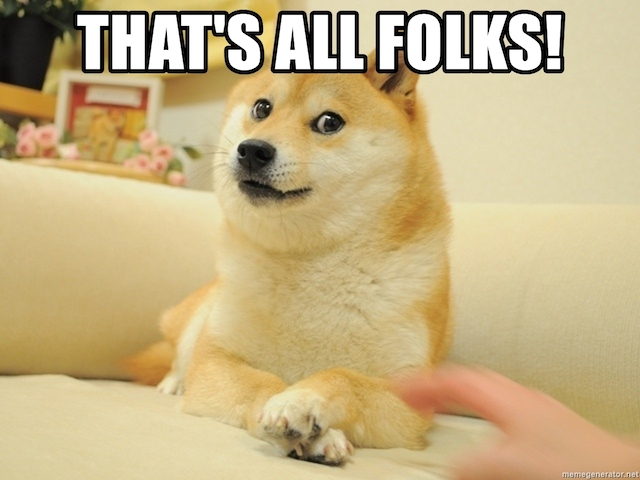

The good news is you basically know the score you already got because of the autograder. In fact, since for the first time the autograder is integrated into Gradescope, you should be able to see your autograder score automatically! There is one question we're manually grading (and we'll check for plagirism), but for the most part things are relatively certain.

Before you submit on Gradescope (you must submit your notebook to receive credit):


1.   Restart and Run-All to make sure there's nothing wrong with your notebook
2.   **Double check that you have the correct PennID (all numbers) in the autograder**. 
3. Make sure you've run all the PennGrader cells
4. Go to the "File" tab at the top left, and click "Download .ipynb" + "Download .py" and upload both the Python file and ipnyb notebook to Gradescope directly, naming the files `homework1.ipynb` and `homeworkw1.py` respectively! If you do not name them correctly, your score will **fail to be recorded** in Gradescope.

**Let the course staff know ASAP if you have any issues submitting. You should _ALWAYS_ confirm that your score on Gradescope right after you submit matches what you expect! It is your responsibility to flag any discrepancies to us _before_ the deadline. Congrats on finishing the first HW!**